In [3]:
import fastf1
from fastf1 import plotting
from fastf1 import utils
import pandas as pd
import matplotlib.pyplot as plt

# Enable FastF1 cache (saves downloaded data)
fastf1.Cache.enable_cache('cache')  # Creates a folder called 'cache'

# Enable matplotlib + FastF1 styling
plotting.setup_mpl()


In [4]:
fastf1.Cache.enable_cache('cache')

In [5]:
session=fastf1.get_session(2024,'Italian GP','FP1')
session.load()

core           INFO 	Loading data for Italian Grand Prix - Practice 1 [v3.6.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '3', '4', '10', '11', '12', '14', '16', '18', '20', '22', '23', '24', '27', '31', '43', '44', '55', '77', '81']


In [6]:
session.drivers


['1',
 '3',
 '4',
 '10',
 '11',
 '12',
 '14',
 '16',
 '18',
 '20',
 '22',
 '23',
 '24',
 '27',
 '31',
 '43',
 '44',
 '55',
 '77',
 '81']

In [7]:
for driver in session.drivers:
    code=session.get_driver(driver)
    print (f"{driver} : {code.FullName} ({code.Abbreviation} - {code.TeamName})")

1 : Max Verstappen (VER - Red Bull Racing)
3 : Daniel Ricciardo (RIC - RB)
4 : Lando Norris (NOR - McLaren)
10 : Pierre Gasly (GAS - Alpine)
11 : Sergio Perez (PER - Red Bull Racing)
12 : Andrea Kimi Antonelli (ANT - Mercedes)
14 : Fernando Alonso (ALO - Aston Martin)
16 : Charles Leclerc (LEC - Ferrari)
18 : Lance Stroll (STR - Aston Martin)
20 : Kevin Magnussen (MAG - Haas F1 Team)
22 : Yuki Tsunoda (TSU - RB)
23 : Alexander Albon (ALB - Williams)
24 : Guanyu Zhou (ZHO - Kick Sauber)
27 : Nico Hulkenberg (HUL - Haas F1 Team)
31 : Esteban Ocon (OCO - Alpine)
43 : Franco Colapinto (COL - Williams)
44 : Lewis Hamilton (HAM - Mercedes)
55 : Carlos Sainz (SAI - Ferrari)
77 : Valtteri Bottas (BOT - Kick Sauber)
81 : Oscar Piastri (PIA - McLaren)


In [8]:
driver_number=16
laps_lec=session.laps.pick_drivers(driver_number)
laps_lec.head()

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
132,0 days 00:17:35.636000,LEC,16,NaT,1.0,1.0,0 days 00:15:04.869000,NaT,NaT,0 days 00:00:43.303000,...,True,Ferrari,0 days 00:15:04.869000,2024-08-30 11:30:38.046,1,NaN,False,,False,False
133,0 days 00:19:32.586000,LEC,16,0 days 00:01:56.950000,2.0,1.0,NaT,NaT,0 days 00:00:28.938000,0 days 00:00:45.591000,...,True,Ferrari,0 days 00:17:35.636000,2024-08-30 11:33:08.813,1,NaN,False,,False,True
134,0 days 00:20:58.914000,LEC,16,0 days 00:01:26.328000,3.0,1.0,NaT,NaT,0 days 00:00:28.129000,0 days 00:00:29.582000,...,True,Ferrari,0 days 00:19:32.586000,2024-08-30 11:35:05.763,1,NaN,False,,False,True
135,0 days 00:22:24.139000,LEC,16,0 days 00:01:25.225000,4.0,1.0,NaT,NaT,0 days 00:00:28.229000,0 days 00:00:28.624000,...,True,Ferrari,0 days 00:20:58.914000,2024-08-30 11:36:32.091,1,NaN,False,,False,True
136,0 days 00:38:42.582000,LEC,16,NaT,5.0,1.0,NaT,0 days 00:24:56.868000,0 days 00:00:43.473000,0 days 00:00:56.645000,...,True,Ferrari,0 days 00:22:24.139000,2024-08-30 11:37:57.316,125,NaN,False,,False,False


In [9]:
lap_lec=laps_lec.pick_fastest()
driver1_data=lap_lec.get_car_data().add_distance()

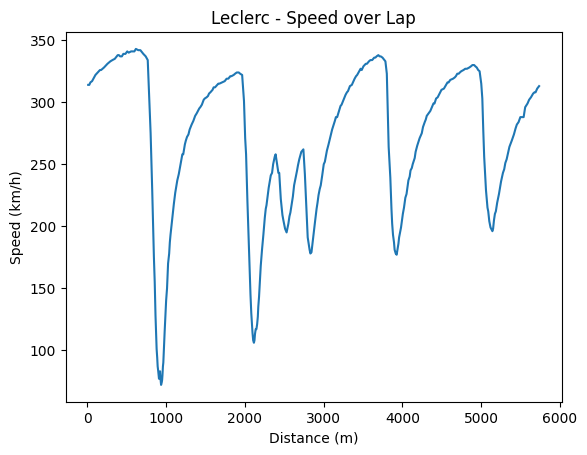

In [10]:
plt.plot(driver1_data['Distance'], driver1_data['Speed'])
plt.xlabel("Distance (m)")
plt.ylabel("Speed (km/h)")
plt.title("Leclerc - Speed over Lap")
plt.show()


In [11]:
driver_number2=1
laps_max=session.laps.pick_drivers(driver_number2)
laps_max.head()

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 00:17:15.830000,VER,1,NaT,1.0,1.0,0 days 00:14:50.596000,NaT,NaT,0 days 00:00:37.004000,...,True,Red Bull Racing,0 days 00:14:50.596000,2024-08-30 11:30:23.773,1,NaN,False,,False,False
1,0 days 00:19:25.499000,VER,1,0 days 00:02:09.669000,2.0,1.0,NaT,NaT,0 days 00:00:36.897000,0 days 00:00:55.060000,...,True,Red Bull Racing,0 days 00:17:15.830000,2024-08-30 11:32:49.007,1,NaN,False,,False,True
2,0 days 00:21:36.688000,VER,1,0 days 00:02:11.189000,3.0,1.0,NaT,NaT,0 days 00:00:44.233000,0 days 00:00:49.891000,...,True,Red Bull Racing,0 days 00:19:25.499000,2024-08-30 11:34:58.676,1,NaN,False,,False,True
3,0 days 00:23:01.381000,VER,1,0 days 00:01:24.693000,4.0,1.0,NaT,NaT,0 days 00:00:28.098000,0 days 00:00:28.729000,...,True,Red Bull Racing,0 days 00:21:36.688000,2024-08-30 11:37:09.865,1,NaN,False,,False,True
4,0 days 00:37:29.630000,VER,1,NaT,5.0,1.0,NaT,0 days 00:25:34.902000,0 days 00:00:50.452000,NaT,...,True,Red Bull Racing,0 days 00:23:01.381000,2024-08-30 11:38:34.558,125,NaN,False,,False,False


In [12]:
lap_max=laps_max.pick_fastest()
driver2_data=lap_max.get_car_data().add_distance()

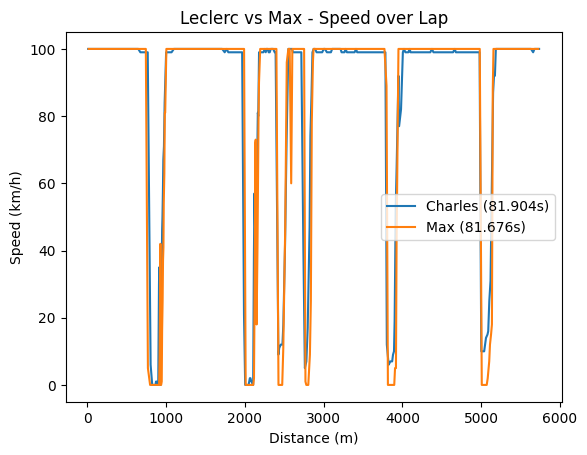

In [13]:
lap_lec_time=lap_lec['LapTime'].total_seconds()
lap_max_time=lap_max['LapTime'].total_seconds()
plt.plot(driver1_data['Distance'], driver1_data['Throttle'],label=f'Charles ({lap_lec_time:.3f}s)')
plt.plot(driver2_data['Distance'],driver2_data['Throttle'],label=f'Max ({lap_max_time:.3f}s)')
plt.xlabel("Distance (m)")
plt.ylabel("Speed (km/h)")
plt.title("Leclerc vs Max - Speed over Lap")
plt.legend()
plt.show()


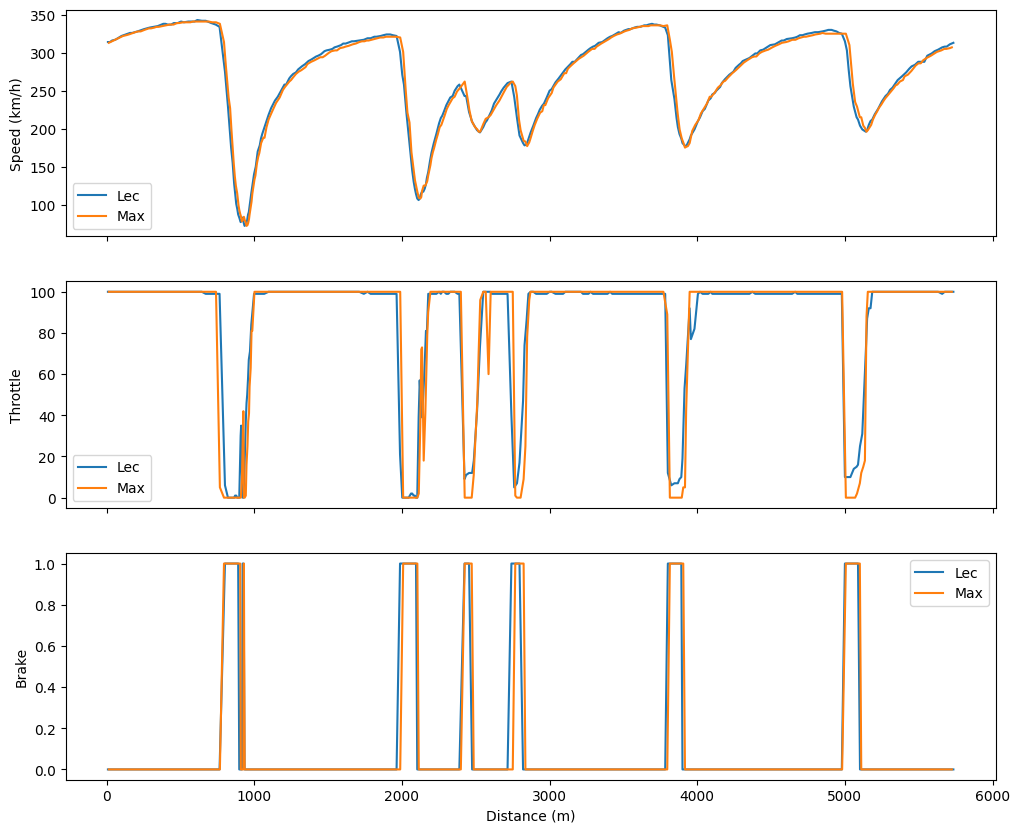

In [14]:
fig,ax=plt.subplots(3,1,figsize=(12,10), sharex=True)
#lec
ax[0].plot(driver1_data['Distance'],driver1_data['Speed'],label='Lec')
ax[1].plot(driver1_data['Distance'],driver1_data['Throttle'],label='Lec')
ax[2].plot(driver1_data['Distance'],driver1_data['Brake'],label='Lec')
#max
ax[0].plot(driver2_data['Distance'],driver2_data['Speed'],label='Max')
ax[1].plot(driver2_data['Distance'],driver2_data['Throttle'],label='Max')
ax[2].plot(driver2_data['Distance'],driver2_data['Brake'],label='Max')
# Labels
ax[0].set_ylabel("Speed (km/h)")
ax[1].set_ylabel("Throttle")
ax[2].set_ylabel("Brake")
ax[2].set_xlabel("Distance (m)")

# Legends
for a in ax:
    a.legend()

In [15]:
print("LEC:", lap_lec['Sector1Time'], lap_lec['Sector2Time'], lap_lec['Sector3Time'])
print("MAX:", lap_max['Sector1Time'], lap_max['Sector2Time'], lap_max['Sector3Time'])



LEC: 0 days 00:00:27.012000 0 days 00:00:27.595000 0 days 00:00:27.297000
MAX: 0 days 00:00:27.005000 0 days 00:00:27.481000 0 days 00:00:27.190000


In [16]:
delta1=lap_lec['Sector1Time']-lap_max['Sector1Time']
delta2=lap_lec['Sector2Time']-lap_max['Sector2Time']
delta3=lap_lec['Sector3Time']-lap_max['Sector3Time']
print('Delta Sectors',delta1.total_seconds(),delta2.total_seconds(),delta3.total_seconds())

Delta Sectors 0.007 0.114 0.107


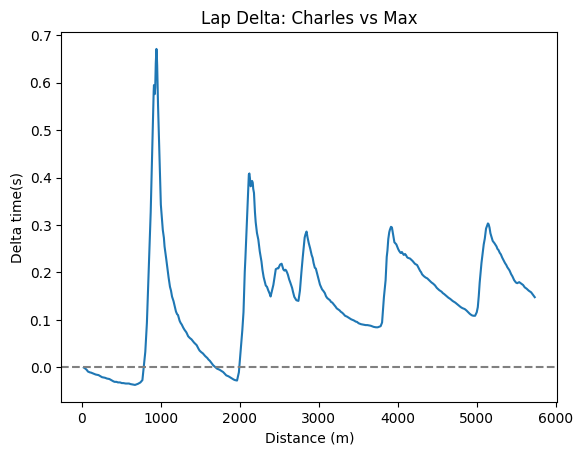

In [17]:
delta=pd.merge_asof(driver1_data,driver2_data,on='Distance',suffixes=('_lec','_max'))
#time delta between points
delta['DeltaDistance']=delta['Distance'].diff()
#time per step for each driver
#convert speed to m/s
delta['Speed_lec_m/s']=delta['Speed_lec']*(1000/3600)
delta['Speed_max_m/s']=delta['Speed_max']*(1000/3600)
#time spent in each distance interval
delta['time_lec']=delta['DeltaDistance']/delta['Speed_lec_m/s']
delta['time_max']=delta['DeltaDistance']/delta['Speed_max_m/s']
#create cumulative time and delta
delta['cumtime_lec']=delta['time_lec'].cumsum()
delta['cumtime_max']=delta['time_max'].cumsum()
delta['LapDelta']=delta['cumtime_lec']-delta['cumtime_max']
plt.plot(delta['Distance'],delta['LapDelta'])
plt.xlabel('Distance (m)')
plt.ylabel('Delta time(s)')
plt.title('Lap Delta: Charles vs Max')
plt.axhline(0,color='gray',linestyle='--')

core           INFO 	Loading data for Italian Grand Prix - Practice 2 [v3.6.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '3', '4', '10', '11', '14', '16', '18', '20', '22', '23', '24', '27', '31', '43', '44', '55', '63', '77', '81']


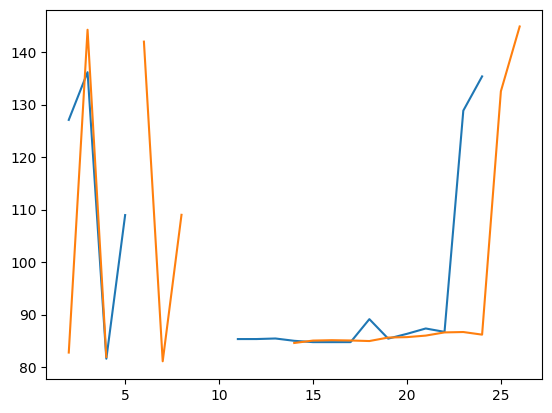

In [18]:
session2=fastf1.get_session(2024,'Italian GP','FP2')
session2.load()
driver_number2=1
laps_max=session2.laps.pick_drivers(driver_number2)
driver_number1=16
laps_lec=session2.laps.pick_drivers(driver_number1)
laptime_max=laps_max['LapTime'].dt.total_seconds()
laptime_lec=laps_lec['LapTime'].dt.total_seconds()
plt.plot(laps_max['LapNumber'],laptime_max)
plt.plot(laps_lec['LapNumber'],laptime_lec)


In [23]:

driver_number1=16
laps_lec=session2.laps.pick_drivers(driver_number1)
long_run_lec=laps_lec.loc[laps_lec["LapNumber"] >= 13]
filtered_lec=long_run_lec.loc[long_run_lec['LapTime'].dt.total_seconds()<95].copy()
print(filtered_lec)
driver_number2=1
laps_max=session2.laps.pick_drivers(driver_number2)
long_run_max=laps_max.loc[laps_max["LapNumber"] >= 13]
filtered_max=long_run_max.loc[long_run_max['LapTime'].dt.total_seconds()<95].copy()
print(filtered_max)

                      Time Driver DriverNumber                LapTime  \
144 0 days 00:58:49.809000    LEC           16 0 days 00:01:24.604000   
145 0 days 01:00:14.871000    LEC           16 0 days 00:01:25.062000   
146 0 days 01:01:40.007000    LEC           16 0 days 00:01:25.136000   
147 0 days 01:03:05.088000    LEC           16 0 days 00:01:25.081000   
148 0 days 01:04:30.062000    LEC           16 0 days 00:01:24.974000   
149 0 days 01:05:55.702000    LEC           16 0 days 00:01:25.640000   
150 0 days 01:07:21.422000    LEC           16 0 days 00:01:25.720000   
151 0 days 01:08:47.432000    LEC           16 0 days 00:01:26.010000   
152 0 days 01:10:14.050000    LEC           16 0 days 00:01:26.618000   
153 0 days 01:11:40.740000    LEC           16 0 days 00:01:26.690000   
154 0 days 01:13:06.933000    LEC           16 0 days 00:01:26.193000   

     LapNumber  Stint PitOutTime PitInTime            Sector1Time  \
144       14.0    5.0        NaT       NaT 0 days 00:0

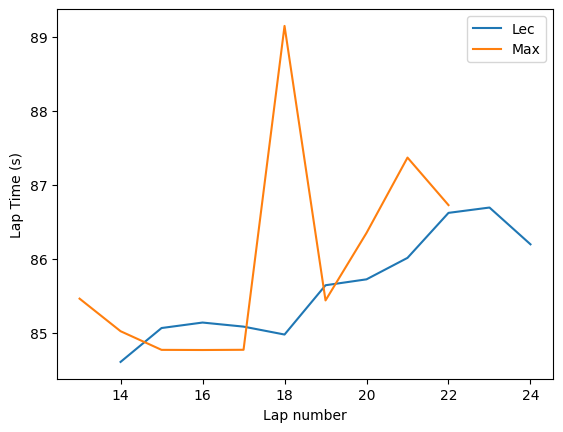

In [20]:
plt.plot(filtered_lec['LapNumber'],filtered_lec['LapTime'].dt.total_seconds(),label='Lec')
plt.plot(filtered_max['LapNumber'],filtered_max['LapTime'].dt.total_seconds(),label='Max')
plt.xlabel('Lap number')
plt.ylabel('Lap Time (s)')
plt.legend()

In [21]:
from scipy import stats
x_lec=filtered_lec['LapNumber']
y_lec=filtered_lec['LapTime'].dt.total_seconds()
x_max=filtered_max['LapNumber']
y_max=filtered_max['LapTime'].dt.total_seconds()
print(stats.linregress(x_lec,y_lec))
print(stats.linregress(x_max,y_max))


LinregressResult(slope=np.float64(0.19551818181818176), intercept=np.float64(81.89679090909091), rvalue=np.float64(0.92479968559239), pvalue=np.float64(4.602272955172296e-05), stderr=np.float64(0.02681148195714441), intercept_stderr=np.float64(0.5164256137314474))
LinregressResult(slope=np.float64(0.2550545454545448), intercept=np.float64(81.51574545454545), rvalue=np.float64(0.538255194172523), pvalue=np.float64(0.10848349640975395), stderr=np.float64(0.14119361226079152), intercept_stderr=np.float64(2.5039483954451534))


In [24]:
filtered_lec['FuelEstimate'] = 100 - (filtered_lec['LapNumber'] - filtered_lec['LapNumber'].min()) * 1.8

In [29]:
filtered_lec['FuelPenalty'] = filtered_lec['FuelEstimate'] * 0.035
filtered_max['FuelEstimate'] = 100 - (filtered_max['LapNumber'] - filtered_max['LapNumber'].min()) * 1.8
filtered_max['FuelPenalty'] = filtered_max['FuelEstimate'] * 0.035
filtered_max['CorrectedLapTime'] = filtered_max['LapTime'].dt.total_seconds() - filtered_max['FuelPenalty']

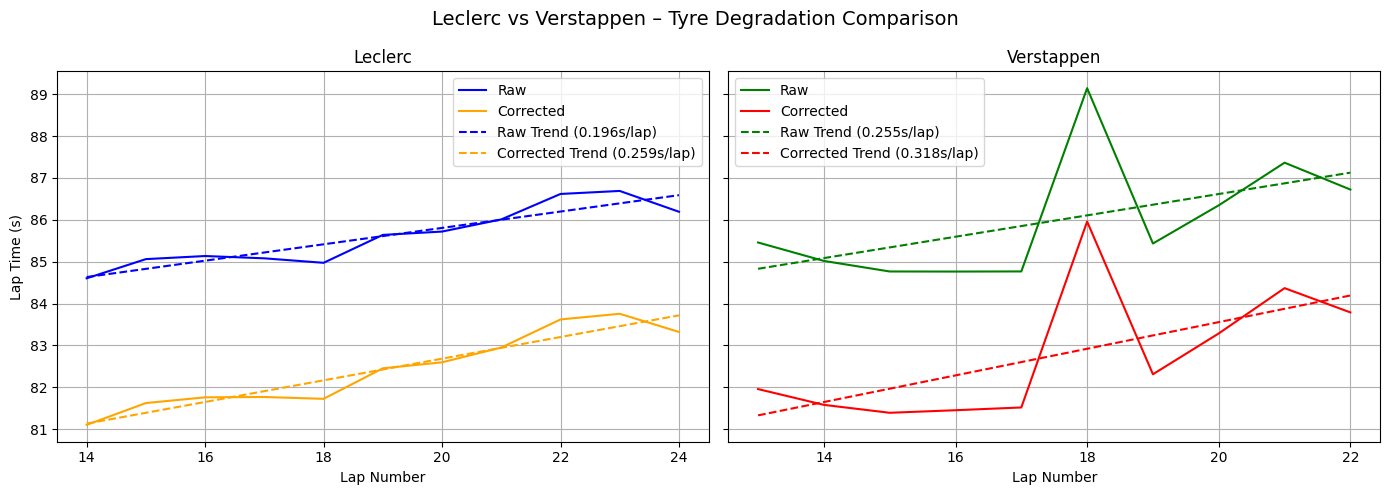

In [31]:
from scipy.stats import linregress

# Leclerc
x_lec = filtered_lec['LapNumber']
y_raw_lec = filtered_lec['LapTime'].dt.total_seconds()
y_corr_lec = filtered_lec['CorrectedLapTime']
slope_raw_lec, intercept_raw_lec, *_ = linregress(x_lec, y_raw_lec)
slope_corr_lec, intercept_corr_lec, *_ = linregress(x_lec, y_corr_lec)

# Max
x_max = filtered_max['LapNumber']
y_raw_max = filtered_max['LapTime'].dt.total_seconds()
y_corr_max = filtered_max['CorrectedLapTime']
slope_raw_max, intercept_raw_max, *_ = linregress(x_max, y_raw_max)
slope_corr_max, intercept_corr_max, *_ = linregress(x_max, y_corr_max)

# Plot
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Leclerc
axs[0].plot(x_lec, y_raw_lec, label='Raw', color='blue')
axs[0].plot(x_lec, y_corr_lec, label='Corrected', color='orange')
axs[0].plot(x_lec, slope_raw_lec * x_lec + intercept_raw_lec, '--', label=f'Raw Trend ({slope_raw_lec:.3f}s/lap)', color='blue')
axs[0].plot(x_lec, slope_corr_lec * x_lec + intercept_corr_lec, '--', label=f'Corrected Trend ({slope_corr_lec:.3f}s/lap)', color='orange')
axs[0].set_title("Leclerc")
axs[0].set_xlabel("Lap Number")
axs[0].set_ylabel("Lap Time (s)")
axs[0].grid(True)
axs[0].legend()

# Verstappen
axs[1].plot(x_max, y_raw_max, label='Raw', color='green')
axs[1].plot(x_max, y_corr_max, label='Corrected', color='red')
axs[1].plot(x_max, slope_raw_max * x_max + intercept_raw_max, '--', label=f'Raw Trend ({slope_raw_max:.3f}s/lap)', color='green')
axs[1].plot(x_max, slope_corr_max * x_max + intercept_corr_max, '--', label=f'Corrected Trend ({slope_corr_max:.3f}s/lap)', color='red')
axs[1].set_title("Verstappen")
axs[1].set_xlabel("Lap Number")
axs[1].grid(True)
axs[1].legend()

fig.suptitle("Leclerc vs Verstappen – Tyre Degradation Comparison", fontsize=14)
plt.tight_layout()
plt.show()